## Lead Scoring Case Study for X Education

Here, we have 37 predictor variables, I need to predict the most promising leads, i.e. the leads that are most likely to convert into paying customers. It will help the company to identify the most potential leads, also known as ‘Hot Leads’.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
path="C:/Subhajit/Newfolder/IOT/DS/Assgnments/Lead Scoring Case Study/Lead+Scoring+Case+Study/Lead Scoring Assignment/"
lead_Data=pd.read_csv(path+"Leads.csv")


### Let's understand the structure of our dataframe

In [3]:
# Let's see the head of our dataset
lead_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- From above table, i can see some of the variables like TotalVisits have the outliers. I will deal with later.

In [5]:
lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

- Here, we can see, the data types of the vriables seeems to be fine and many columns are having missing values. 

- Let's see the number of rows and columns in te data set.

In [6]:
lead_Data.shape

(9240, 37)

## Data Preparation



##### Converting all select value to null because customers have not selected or choosen any vlaue so, it's considered as null value. 

In [7]:

for col in lead_Data.columns:
    lead_Data[col]=lead_Data[col].apply(lambda x: None if x=='Select' else x )
    
     

- Let's check the percenatge of null values after conversion of Select value.
### Identifying the missing data and using appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

In [8]:
round(100*(lead_Data.isnull().sum()/len(lead_Data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 


- let's find out all columns where missing values are more than certain percentage, lets's take 45%.

In [9]:
ColumnsWithNull_DF_lead_Data=round(100*(lead_Data.isnull().sum()/len(lead_Data.index)),2)
ColumnsWithNull_DF_lead_Data=ColumnsWithNull_DF_lead_Data[ColumnsWithNull_DF_lead_Data>45]
print("\n Number of Columns, where Null values are more than 45%: ",len(ColumnsWithNull_DF_lead_Data.index))
print(ColumnsWithNull_DF_lead_Data.index)


 Number of Columns, where Null values are more than 45%:  7
Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


- As we can see here, there are 7 columns which have more than 45% of null values. Although Lead Quality has 51% null value, it's a very important variable to do the prediction. So, i have decided to keep "Lead Quality" column and removing remaining columns. 

In [10]:
lead_Data_Master=lead_Data.drop(['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)

In [11]:
round(100*(lead_Data_Master.isnull().sum()/len(lead_Data_Master.index)),2)



Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- From above table, we can see many variables have more than 20 to 30 % of null data. But these variables are important and required to predict the score of the leads. So, I am going to impute the each column.

- For City column, Let's check the most frequent values. 

In [12]:
lead_Data_Master['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

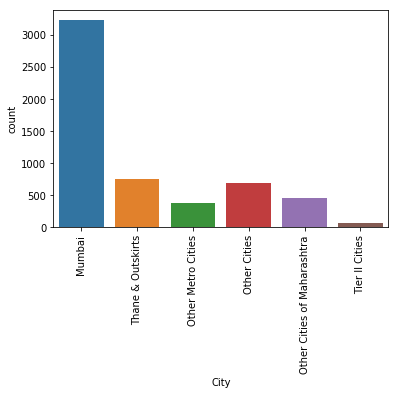

In [13]:
s=sns.countplot(lead_Data_Master['City'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- from above plot, we can see, "Mumbai" is the most frequent value. So, we can replace null value with "Mumbai"

In [14]:
lead_Data_Master['City'].fillna('Mumbai', inplace=True)

- Let's start with highest null value percenatge

#### Lead Quality:- It indicates quality of the lead and intuition of th eemployee who has been assigned to the lead.  


- Let's describe the Lead Quality column


In [15]:
lead_Data_Master['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

- From above details, we can see "Might be" is the mostly used value. 

- Let's plot the count of all the values

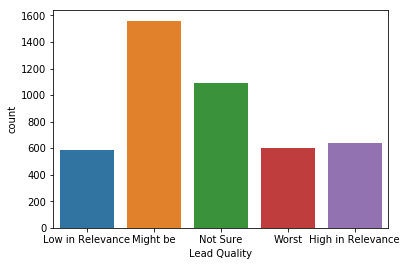

In [16]:
sns.countplot(lead_Data_Master['Lead Quality'])
plt.show()

- From the above plot, we can see after "might be", Not Sure is the second mostly used value. So, if customer has not choosen any value, we can replace the null values with "Not Sure". 

In [17]:
lead_Data_Master['Lead Quality'].fillna('Not Sure', inplace=True)

#### Specialization :- The industry domain in which the customer worked before

- Let's describe the "Specialization" column 

In [18]:
lead_Data_Master['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

- From above table, we can see Finance management is having high value. 

- Let's count each value by plotting count plot 

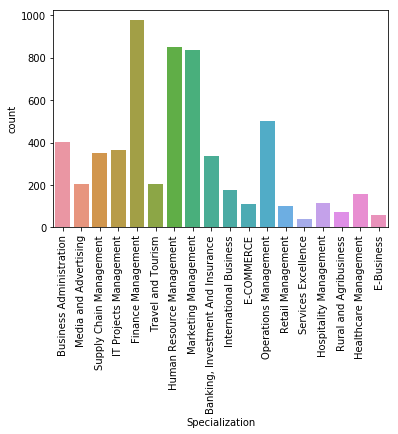

In [19]:
s=sns.countplot(lead_Data_Master['Specialization'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, customer may be a student and it may not have any specialization. Since, the number of occurrence of "Finance Management" value is high but as compared to all the rows, we can't replace null with "Finance Management". So, we will create a new category of specialization called "Others".

In [20]:
lead_Data_Master['Specialization'].fillna('Others', inplace=True)

#### Tags:-  As it indicates the current status of the lead, it's very important to keep. 

- Let's describe the "Tags" column

In [21]:
lead_Data_Master['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

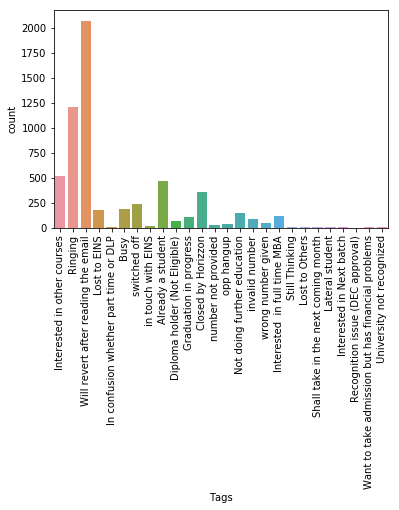

In [22]:
s=sns.countplot(lead_Data_Master['Tags'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see the mostly used value is  'Will revert after reading the email'. So, we can direcltly replace the null value with the same.

In [23]:
lead_Data_Master['Tags'].fillna('Will revert after reading the email', inplace=True)

#### What matters most to you in choosing a course:- It indicates what is their main motto behind doing this course.

- Let's describe the "What matters most to you in choosing a course" column

In [24]:
lead_Data_Master['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

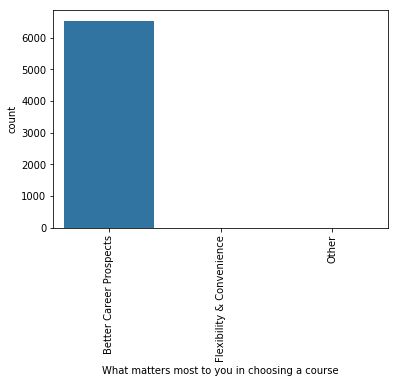

In [25]:
s=sns.countplot(lead_Data_Master['What matters most to you in choosing a course'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- As we can see , almost all the values are "Better Career Prospects", we can replace null values with the same.

In [26]:
lead_Data_Master['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

#### What is your current occupation:- Indicates whether the customer is a student, umemployed or employed.

- Let's describe the variable

In [27]:
lead_Data_Master['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

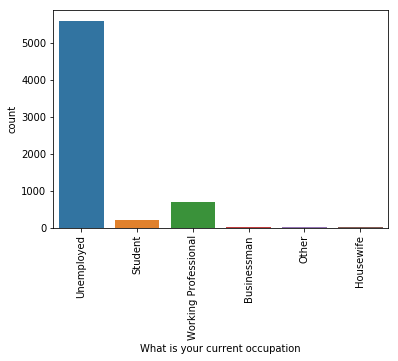

In [28]:
s=sns.countplot(lead_Data_Master['What is your current occupation'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see almost all the customers are Unemployed. So, we are replacing null value with the same.

In [29]:
lead_Data_Master['What is your current occupation'].fillna('Unemployed', inplace=True)

#### Country:- indicates country of the customer

- Let's describe the country

In [30]:
lead_Data_Master['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

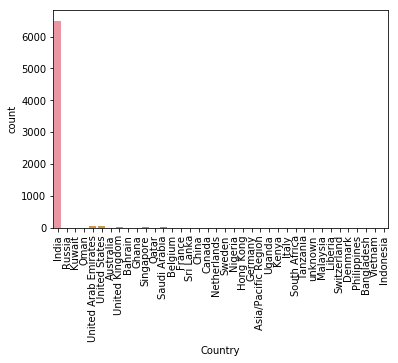

In [31]:
s=sns.countplot(lead_Data_Master['Country'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Since, most of the customers are Indian, we can replace the null value with India.

In [32]:
lead_Data_Master['Country'].fillna('India', inplace=True)

- Let's see the status of the null value percenatge.

In [33]:
round(100*(lead_Data_Master.isnull().sum()/len(lead_Data_Master.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

- Here, we can see the total 4 variables are there with very less percentage of null value. So, We can remove those rows.

In [34]:
lead_Data_Master.dropna(inplace=True)

In [35]:
lead_Data_Final=lead_Data_Master

In [36]:
round(100*(lead_Data_Master.isnull().sum()/len(lead_Data_Master.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### Now, the dataset is looking fine.

### Checking for outliers all numerical data and treating them

In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_DF = lead_Data_Master.select_dtypes(include=numerics)
numeric_DF.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

### TotalVisits

In [38]:
lead_Data_Master['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

- we can see the outlier here. So, let's plot the box plot.

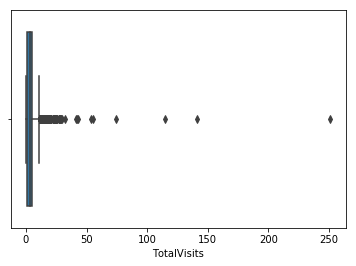

In [39]:
sns.boxplot(lead_Data_Master['TotalVisits'])
plt.show()

- Here, we can see the outliers. So, we will treat them.

In [40]:
Q1=lead_Data_Master['TotalVisits'].quantile(0.05)
Q3=lead_Data_Master['TotalVisits'].quantile(0.95)
lead_Data_Master['TotalVisits'][lead_Data_Master['TotalVisits'] <= Q1] = Q1
lead_Data_Master['TotalVisits'][lead_Data_Master['TotalVisits'] >= Q3] = Q3

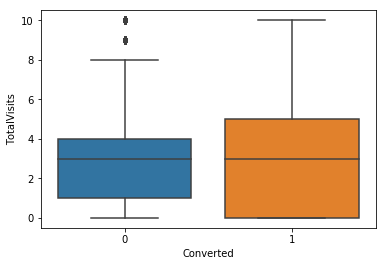

In [41]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_Data_Master)
plt.show()

- After removing outliers, we can see this feature will be useful for improving leading score.

### Total Time Spent on Website

In [42]:
lead_Data_Master['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

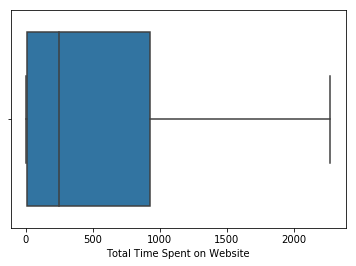

In [43]:
sns.boxplot(lead_Data_Master['Total Time Spent on Website'])
plt.show()

- Here, we are not getting any outliers. So, we will check the converted score as per this feature.

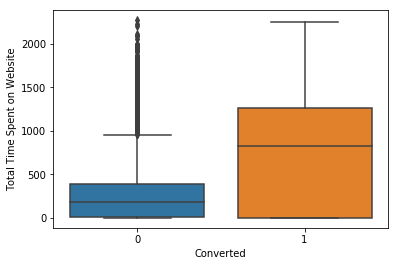

In [44]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_Data_Master)
plt.show()

- We can see, website is an important criteria for improving conversion score.

### Page Views Per Visit

In [45]:
lead_Data_Master['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

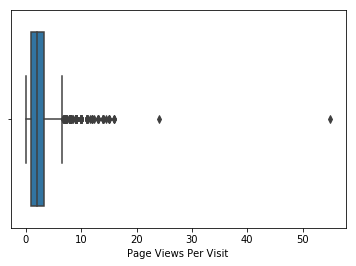

In [46]:
sns.boxplot(lead_Data_Master['Page Views Per Visit'])
plt.show()

- Here, we can see the outliers. So, we will treat them.

In [47]:
Q1=lead_Data_Master['Page Views Per Visit'].quantile(0.05)
Q3=lead_Data_Master['Page Views Per Visit'].quantile(0.95)
lead_Data_Master['Page Views Per Visit'][lead_Data_Master['Page Views Per Visit'] <= Q1] = Q1
lead_Data_Master['Page Views Per Visit'][lead_Data_Master['Page Views Per Visit'] >= Q3] = Q3

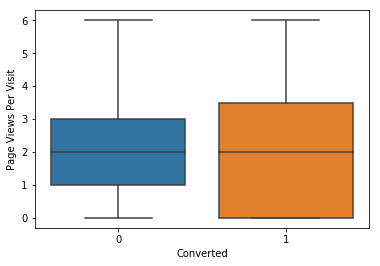

In [48]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_Data_Master)
plt.show()

- We can see, Page is also an important criteria for improving converted score.



##### Now we have all filtered variables. But, we need to find out the most relevant variables, which will be used for predicting the high convrted score. So, We can select these relevant features by using "Converted" variable. 

- Here, Converted variable is the target variable, which indicates whether a lead has successfully converted or not.

- So, Lets start with the analysis of all the variables one by one.


##### Since  Lead Number are not required for predicting the lead score, it can be reomved. 

In [49]:
lead_Data_Master=lead_Data_Master.drop(['Lead Number'],1)

#### Lead Origin feature

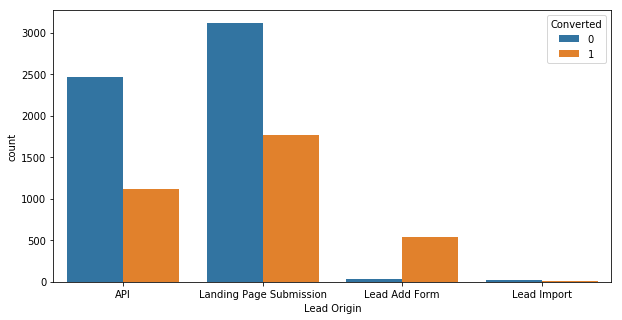

In [50]:
plt.figure(figsize = (10,5))
sns.countplot(x='Lead Origin',hue='Converted',data=lead_Data_Master)
plt.show()

- From above plot, API, Landing Page Submission and Lead Add Form are having impact on conversion rate. 
- Even though, API and Landing Page Submission are having less 'Converted' rate, but the amount of lead is being generated can be considered.
- In case of Lead Add Form, we can clearly see the amount of 'Converted' is less but the converted rate is more. For 'Lead Import', the converted rate is very low.
- So, we will consider these 3 values to improve conversion rate.

#### Lead Source Feature

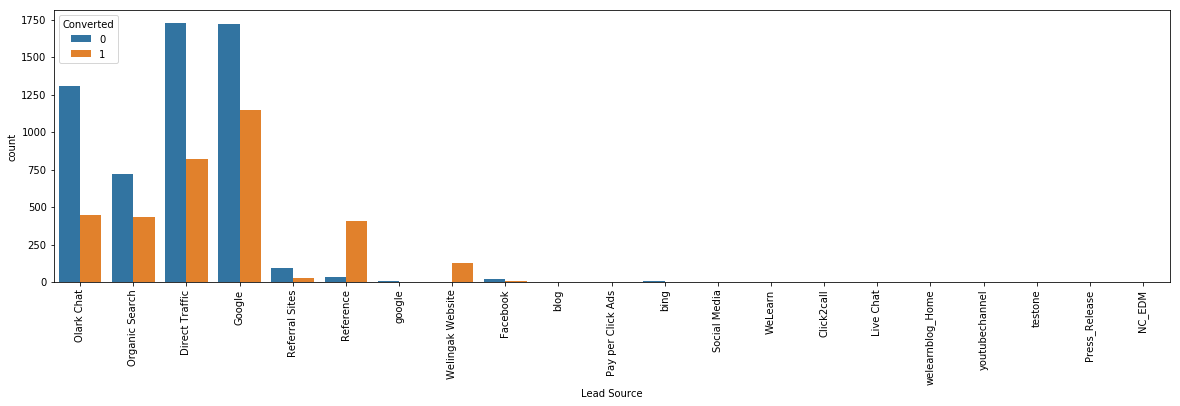

In [51]:
plt.figure(figsize = (20,5))
s=sns.countplot(x='Lead Source',hue='Converted',data=lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see there are some repeated variables like Google. So, it can be merged. 
- The sources like blog, bing, Click2Call, etc. are ahving very less and similar amount of converted rate. So, these variables can also be merged by creating a new value say 'Othersources'.

In [52]:
lst_others=['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home'
            ,'youtubechannel','testone','Press_Release','NC_EDM']
            
lead_Data_Master['Lead Source']=lead_Data_Master['Lead Source'].apply(lambda x: 'Google' if x=='google' else x)
lead_Data_Master['Lead Source']=lead_Data_Master['Lead Source'].apply(lambda x: 'Other sources' if x in lst_others else x)

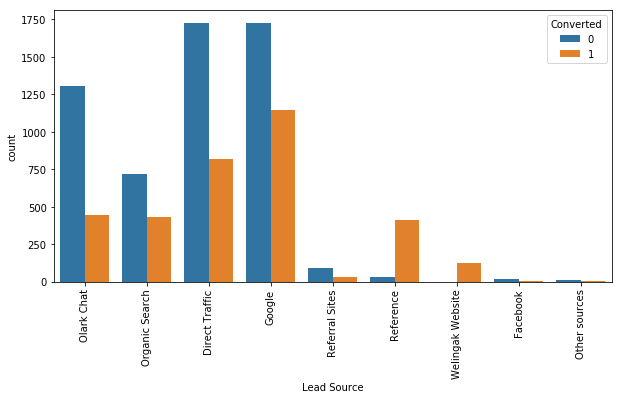

In [53]:
plt.figure(figsize = (10,5))
s=sns.countplot(x='Lead Source',hue='Converted',data=lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see Direct Traffic and Google can be helpful to increase conversion rate.

#### Do Not Email and Do Not Call

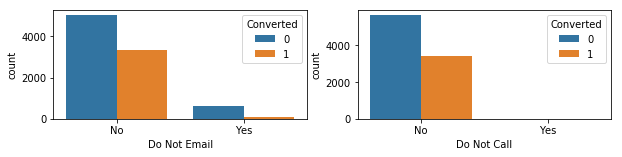

In [54]:
fig, axes = plt.subplots(1,2,figsize = (10,2))
sns.countplot(x='Do Not Email',hue='Converted',data=lead_Data_Master,ax = axes[0])
sns.countplot(x='Do Not Call',hue='Converted',data=lead_Data_Master,ax = axes[1])

plt.show()

#### Country

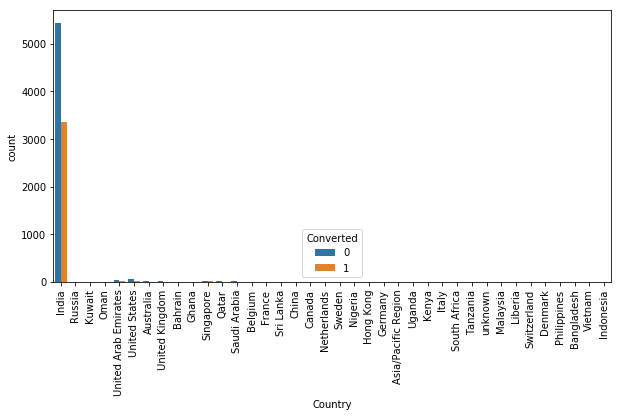

In [55]:
plt.figure(figsize = (10,5))
s=sns.countplot(x='Country',hue='Converted',data=lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [56]:
lead_Data_Master.drop('Country',1,inplace=True)

- We can see, almost all the leads are from india. So, we can remove the country feature.

### Last Activity

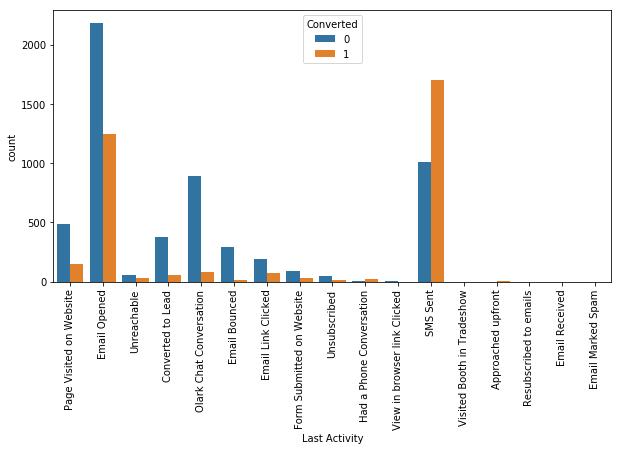

In [57]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- here, Many of the values are having much impact. So, we group them into one value.


In [58]:
lst_others=['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront',
            'Resubscribed to emails','Email Received','Email Marked Spam'
            ,'Unsubscribed']
lead_Data_Master['Last Activity']=lead_Data_Master['Last Activity'].apply(lambda x: 'Other Last Activity' if x in lst_others else x)

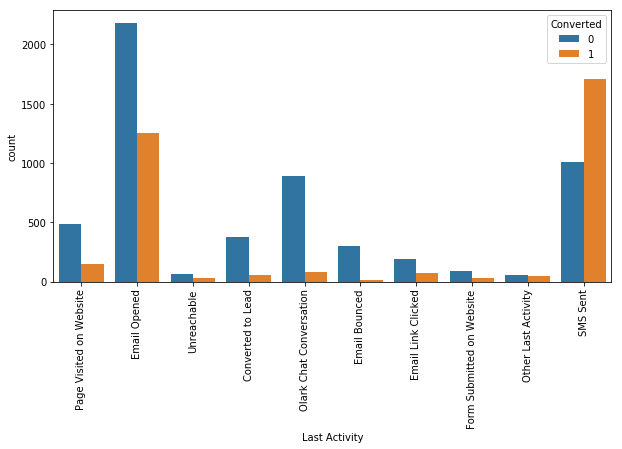

In [59]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see most of the leads do the activities like Email and SMS sending.

### Specialization

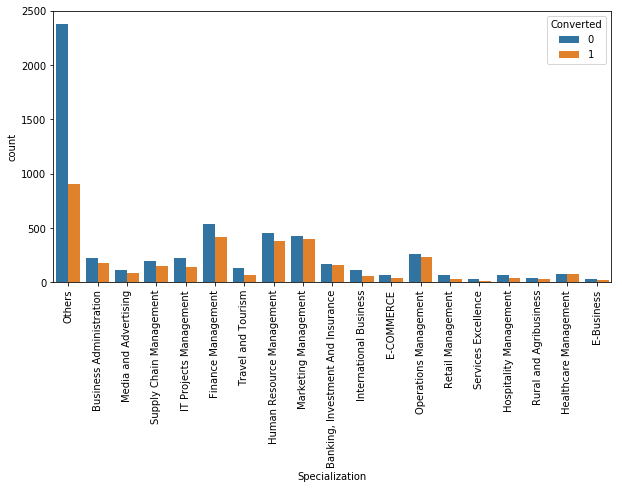

In [60]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Specialization", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Most of the leads are having specialisation in other program.

### Current occupation

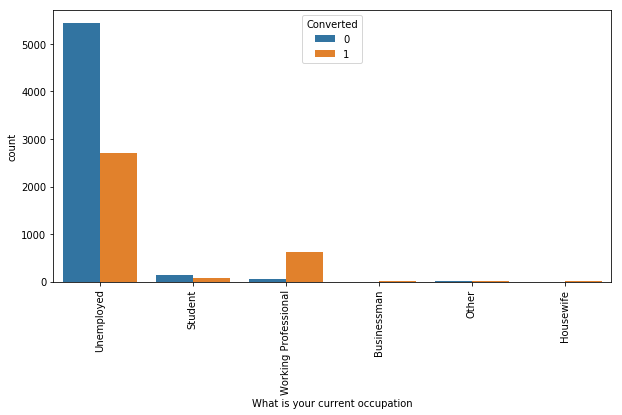

In [61]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Working Professional are more likely to join the courses. So, our focus should be more on them.
- For Unemployed leads, the conversion rate is less  but the number of joinees are more.

### Choosing a course

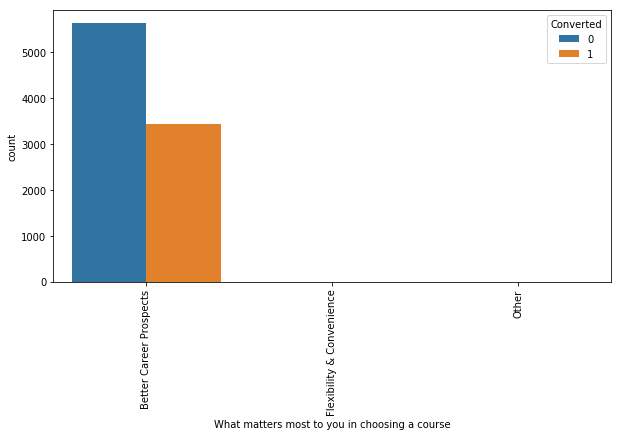

In [62]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [63]:
lead_Data_Master.drop('What matters most to you in choosing a course',1,inplace=True)

- Here, All the leads have given the same reason. It doesn't impact on the converted rate. So, we will remove it.   

### Search

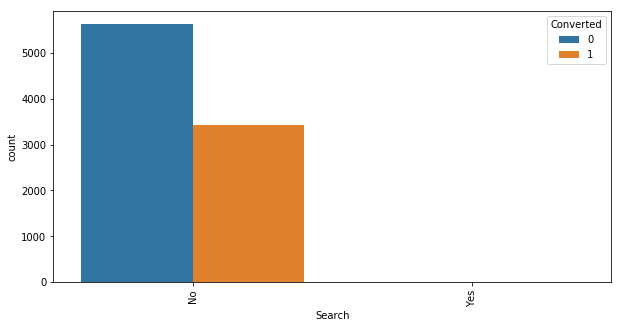

In [64]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Search", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [65]:
lead_Data_Master.drop('Search',1,inplace=True)

- Here, most of the leads are not searching. So, it can also be removed. 

### Magazine

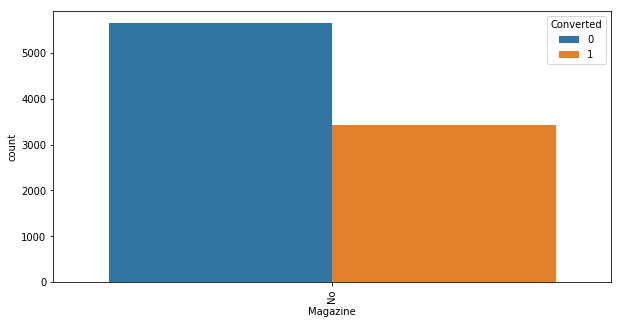

In [66]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Magazine", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [67]:
lead_Data_Master.drop('Magazine',1,inplace=True)

- Here, most of the leads are not seeing the ad in magazines. So, it can also be removed. 

### Newspaper Article

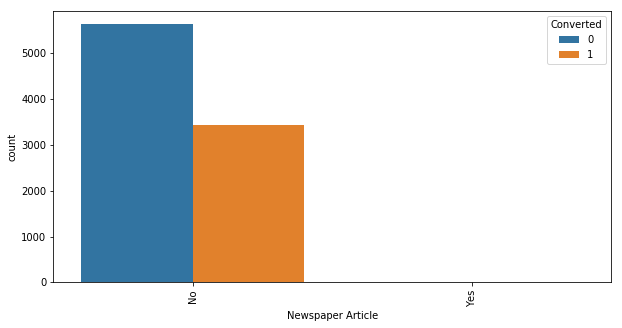

In [68]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [69]:
lead_Data_Master.drop('Newspaper Article',1,inplace=True)

- It can also be removed.

### X Education Forums

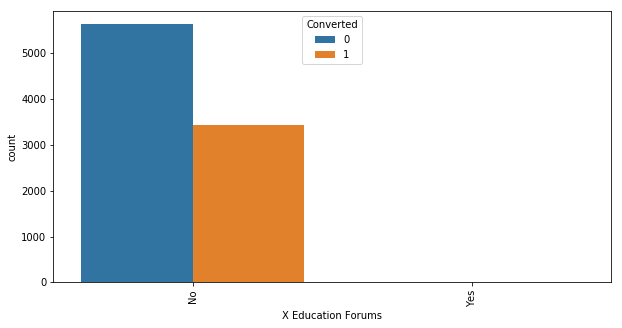

In [70]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [71]:
lead_Data_Master.drop('X Education Forums',1,inplace=True)

It can also be removed.

### Newspaper

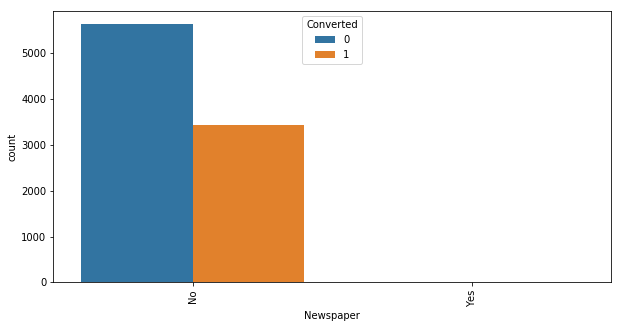

In [72]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Newspaper", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [73]:
lead_Data_Master.drop('Newspaper',1,inplace=True)

- It can also be removed.

### Digital Advertisement 

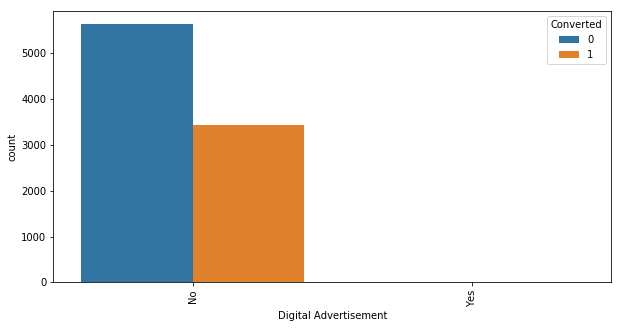

In [74]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [75]:
lead_Data_Master.drop('Digital Advertisement',1,inplace=True)

It can also be removed.

### Through Recommendations

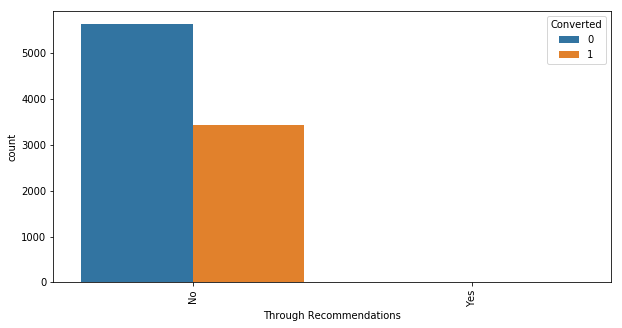

In [76]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [77]:
lead_Data_Master.drop('Through Recommendations',1,inplace=True)

- It can also be removed.

### Receive More Updates About Our Courses

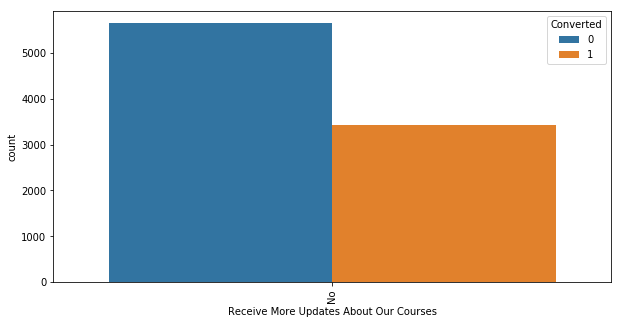

In [78]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [79]:
lead_Data_Master.drop('Receive More Updates About Our Courses',1,inplace=True)

- It can also be removed.

### Tags

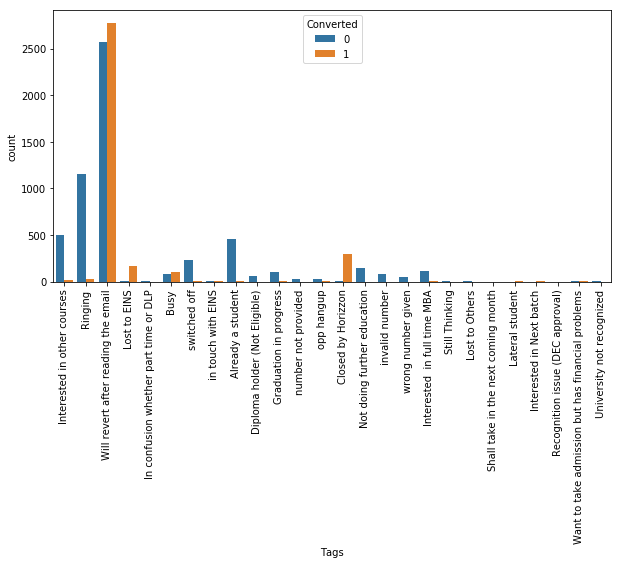

In [80]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Tags", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, many of the values has no entries from leads. So, we can group them into a single value.

In [81]:
lst_others=['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Graduation in progress',
            'number not provided','opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student',
            'Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized']
lead_Data_Master['Tags']=lead_Data_Master['Tags'].apply(lambda x: 'Other Tags' if x in lst_others else x)

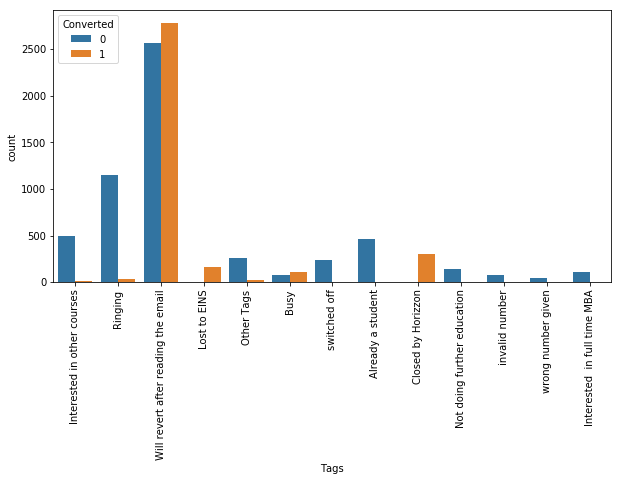

In [82]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Tags", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- As we know before, Many of the leads are doing emails and sms fro the courses.

### Lead Quality

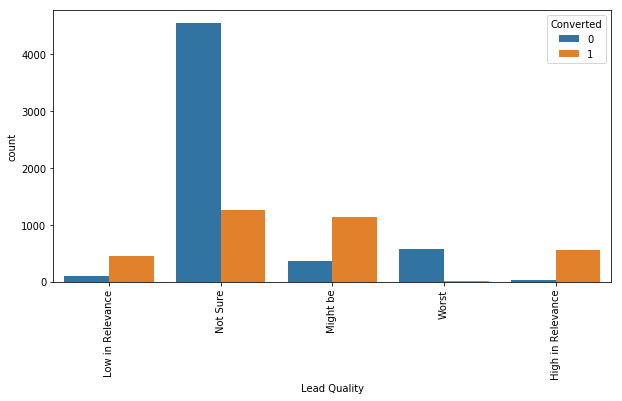

In [83]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Most of the leads are not sure, whether they will join or not.

### Update me on Supply Chain Content

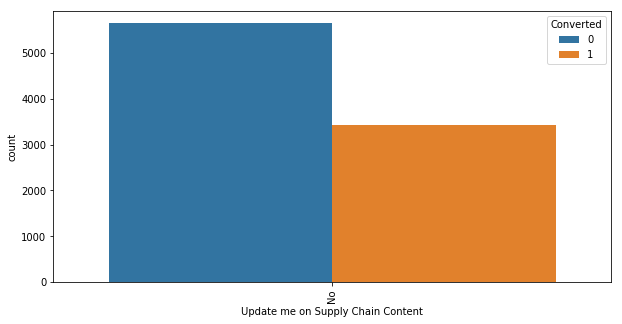

In [84]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [85]:
lead_Data_Master.drop('Update me on Supply Chain Content',1,inplace=True)

- It can be removed.

### Get updates on DM Content 

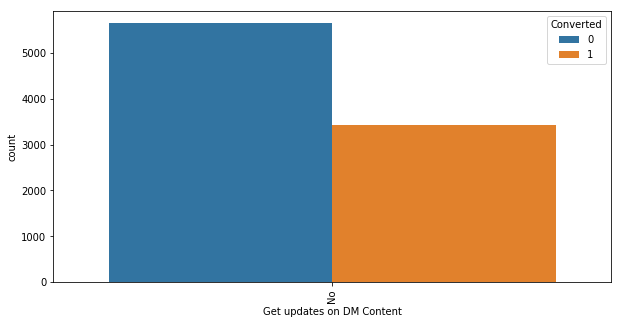

In [86]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [87]:
lead_Data_Master.drop('Get updates on DM Content',1,inplace=True)

- It can be removed.

### City

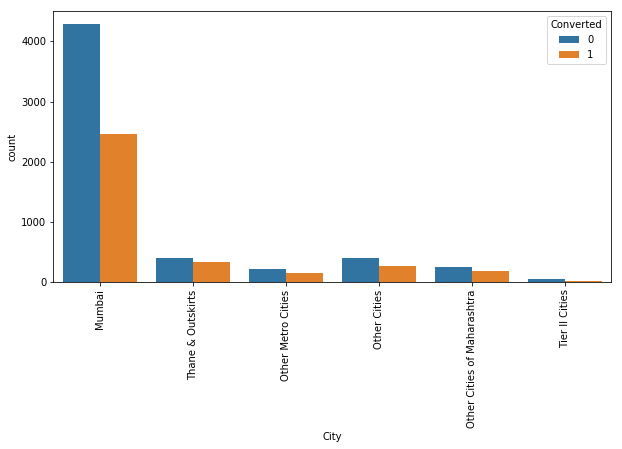

In [88]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "City", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Most of the leads are from Mumbai.

### I agree to pay the amount through cheque

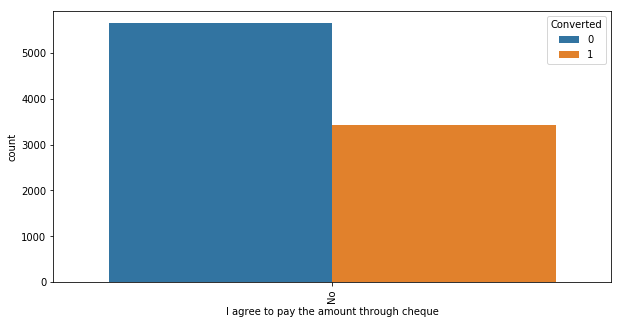

In [89]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [90]:
lead_Data_Master.drop('I agree to pay the amount through cheque',1,inplace=True)

- It can be removed as most of the entries are NO.

### A free copy of Mastering The Interview

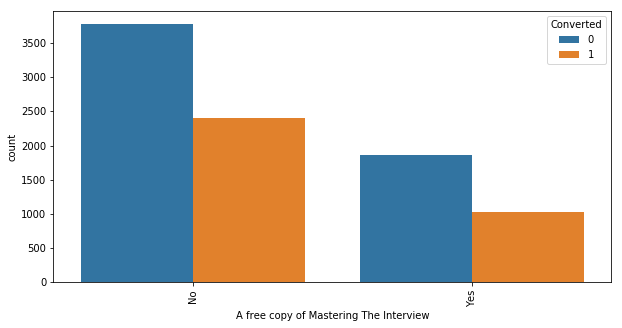

In [91]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [92]:
lead_Data_Master.drop('A free copy of Mastering The Interview',1,inplace=True)

- Here also, maximum entries are No. So, it can also be removed.

### Last Notable Activity

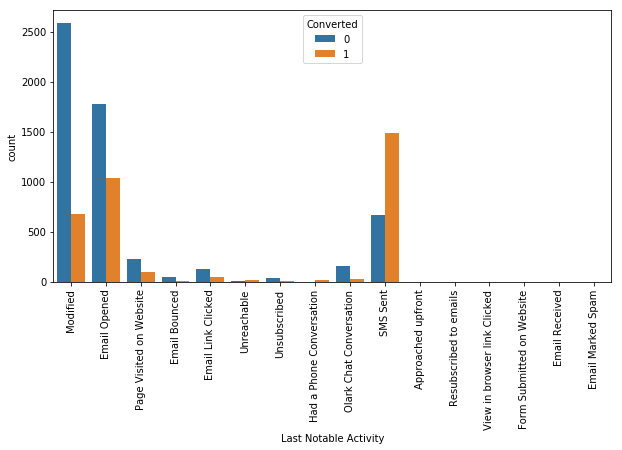

In [93]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see most of the activities are being happened by leads. So, these can be grouped into one value.

In [94]:
lst_others=['Email Bounced', 'Unreachable','Unsubscribed','Had a Phone Conversation',
            'Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received',
            'Email Marked Spam']
lead_Data_Master['Last Notable Activity']=lead_Data_Master['Last Notable Activity'].apply(lambda x: 'Other LastNotableActivity' if x in lst_others else x)

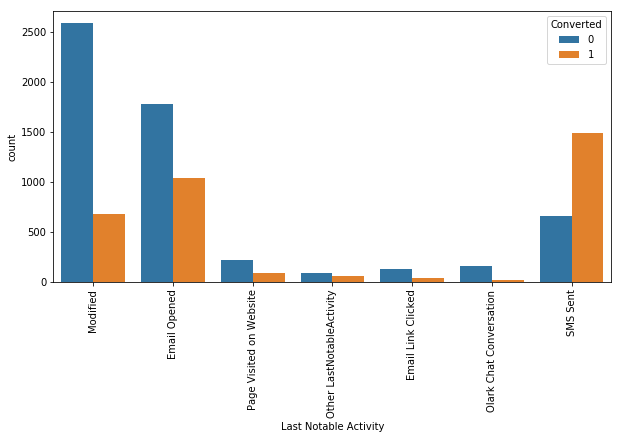

In [95]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, most of the leads opened the email and sent the message.

### After doing analysis, we will see the final set of features, which all are required for the further analysis and building the model.

In [96]:
Lead_Data_Final2=lead_Data_Master
lead_Data_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null object
Do Not Call                        9074 non-null object
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
City                               9074 non-null object
Last Notable Activity              9074 non-null obje

In [97]:
print('The total number of fetaures are: ',lead_Data_Master.shape[1])

The total number of fetaures are:  16


- Let's apply binary conversion of the below features

In [98]:
# Converting Yes to 1 and No to 0
lead_Data_Master['Do Not Email']=lead_Data_Master['Do Not Email'].map({'Yes':1,'No':0})
lead_Data_Master['Do Not Call']=lead_Data_Master['Do Not Call'].map({'Yes':1, 'No':0})

### Dummy Variable Creation

In [99]:
lead_Data_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null int64
Do Not Call                        9074 non-null int64
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
City                               9074 non-null object
Last Notable Activity              9074 non-null object

In [100]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
LeadOrigin = pd.get_dummies(lead_Data_Master['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,LeadOrigin],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
LeadSource = pd.get_dummies(lead_Data_Master['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,LeadSource],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
LastActivity = pd.get_dummies(lead_Data_Master['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,LastActivity],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
Specialization = pd.get_dummies(lead_Data_Master['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,Specialization],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
choosing_a_course = pd.get_dummies(lead_Data_Master['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,choosing_a_course],axis=1)

# Creating a dummy variable for the variable 'Tags' and dropping the first one.
Tags = pd.get_dummies(lead_Data_Master['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,Tags],axis=1)

# Creating a dummy variable for the variable 'Receive More Updates About Our Courses' and dropping the first one.
LeadQuality = pd.get_dummies(lead_Data_Master['Lead Quality'],prefix='Lead Quality',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,LeadQuality],axis=1)

# Creating a dummy variable for the variable 'Receive More Updates About Our Courses' and dropping the first one.
City = pd.get_dummies(lead_Data_Master['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,City],axis=1)

# Creating a dummy variable for the variable 'Receive More Updates About Our Courses' and dropping the first one.
Notable_Activity = pd.get_dummies(lead_Data_Master['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,Notable_Activity],axis=1)

#### Dropping repeated variables

- We can drop the original variables, for which we created dummy variables

In [101]:
lead_Data_Master=lead_Data_Master.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                                        'What is your current occupation',
                                       'Tags','Lead Quality','City',
                                        'Last Notable Activity'],1)

In [102]:
lead_Data_Master.shape

(9074, 77)

### Splitting Data into train and test data set

In [103]:
# Putting feature variable to X
X = lead_Data_Master.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LastNotableActivity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [104]:
y=lead_Data_Master['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Checking for all the numerical data for Feature Standardisation

In [106]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_DF = X_train.select_dtypes(include=numerics)
numeric_DF.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')


### Feature Standardisatio/Scaling

- Normalising continuous features

In [107]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\611806022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\611806022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LastNotableActivity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### Checking the converted rate

In [109]:
# First, let's look at the overall Conversion rate.
lead_Data_Master['Converted'].value_counts().to_frame()

,Converted
0,5639
1,3435


Conversion rate from leads to paying customer:  38.0 %
Non coversion rate:  62.0 %
The ratio is 2.0


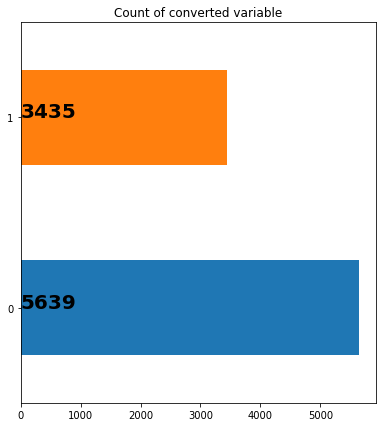

In [110]:
print('Conversion rate from leads to paying customer: ',round(100*lead_Data_Master['Converted'].sum()/len(lead_Data_Master['Converted'])),'%')
print('Non coversion rate: ',100-round(100*lead_Data_Master['Converted'].sum()/len(lead_Data_Master['Converted'])),'%')
print('The ratio is',round((lead_Data_Master["Converted"].value_counts().values[0]/lead_Data_Master["Converted"].value_counts().values[1])))
plt.figure(figsize=(14,7))
plt.subplot(122)
ax = lead_Data_Master["Converted"].value_counts().plot(kind="barh")

for i,j in enumerate(lead_Data_Master["Converted"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of converted variable")
plt.show()

In [111]:
converted=round((sum(lead_Data_Master['Converted'])/len(lead_Data_Master['Converted']))*100,2)
print("The total leads conversion rate as of now: ",converted,"%")

The total leads conversion rate as of now:  37.86 %


### Model Building Phase

- Running First Training Model

In [112]:
import statsmodels.api as sm

In [113]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1251.0
Date:                Mon, 26 Aug 2019   Deviance:                       2502.0
Time:                        15:23:12   Pearson chi2:                 3.35e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0380      1.877     -0.020      0.984      -3.717       3.641
Do Not Email                                            -1.4282      0.318     -4.495      0.000      -2.051      -0.806
Do Not Call                                             23.7134   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1857      0.087      2.143      0.032       0.016       0.356
Total Time Spent on Website                              1.1455      0.064     17.927      0.000       1.020       1.271
Page Views Per Visit                                    -0.3253      0.099     -3.294      0.001      -0.519      -0.132
Lead Origin_Landing Page Submission                     -0.9732      0.221     -4.408      0.000      -1.406      -0.540
Lead Origin_Lead Add Form                               -0.3824      1.284     -0.298      0.766      -2.898       2.134
Lead Origin_Lead Import                                 29.7346   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6298   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2048      0.155      1.326      0.185      -0.098       0.508
Lead Source_Olark Chat                                   0.8706      0.234      3.728      0.000       0.413       1.328
Lead Source_Organic Search                               0.2211      0.210      1.052      0.293      -0.191       0.633
Lead Source_Other sources                                0.7220      0.811      0.890      0.373      -0.868       2.312
Lead Source_Reference                                    1.7607      1.341      1.313      0.189      -0.867       4.388
Lead Source_Referral Sites                              -0.1108      0.490     -0.226      0.821      -1.071       0.850
Lead Source_Welingak Website                             5.4694      1.484      3.685      0.000       2.561       8.378
Last Activity_Email Bounced                             -0.0737      0.691     -0.107      0.915      -1.428       1.281
Last Activity_Email Link Clicked                         0.8350      0.644      1.296      0.195      -0.428       2.097
Last Activity_Email Opened                              -0.0067      0.384     -0.018      0.986      -0.760       0.747
Last Activity_Form Submitted on Website                  0.0781      0.587      0.133      0.894      -1.071       1.228
Last Activity_Olark Chat Conversation                   -0.5525      0.392     -1.410      0.158      -1.320       0.215
Last Activity_Other Last Activity                        0.7835      0.751      1.043      0.297      -0.689       2.256
Last Activity_Pa

### Feature Selection Using RFE

In [114]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [115]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)  ## we will build our model by using 15 variables
rfe=rfe.fit(X_train,y_train)

In [116]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True])

In [117]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Other sources', False, 44),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 53),
 ('Last Activity_Email Opened', False, 49),
 ('Last Activity_Form Submitted on Website', False, 56),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Last Activity', False, 16),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity

In [118]:
col=X_train.columns[rfe.support_]

In [119]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Other Last Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Speciali

- Running second model 

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1558.0
Date:                Mon, 26 Aug 2019   Deviance:                       3115.9
Time:                        15:23:15   Pearson chi2:                 3.05e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5712      0.209     -7.528      0.000      -1.980      -1.162
Do Not Email                                -1.3902      0.211     -6.602      0.000      -1.803      -0.977
Lead Origin_Lead Add Form                    1.0619      0.362      2.932      0.003       0.352       1.772
Lead Source_Welingak Website                 3.2636      0.818      3.989      0.000       1.660       4.867
Last Activity_Olark Chat Conversation       -1.3588      0.184     -7.369      0.000      -1.720      -0.997
Tags_Busy                                    3.4449      0.328     10.493      0.000       2.801       4.088
Tags_Closed by Horizzon                      7.7494      0.768     10.084      0.000       6.243       9.256
Tags_Lost to EINS                            8.8828      0.754     11.780      0.000       7.405      10.361
Tags_Ringing                                -2.0614      0.336     -6.139      0.000      -2.720      -1.403
Tags_Will revert after reading the email     3.7424      0.226     16.545      0.000       3.299       4.186
Tags_invalid number                        -23.5605    2.2e+04     -0.001      0.999   -4.32e+04    4.31e+04
Tags_switched off                           -2.6785      0.587     -4.564      0.000      -3.829      -1.528
Tags_wrong number given                    -23.2010   3.16e+04     -0.001      0.999   -6.19e+04    6.18e+04
Lead Quality_Not Sure                       -3.4233      0.127    -27.041      0.000      -3.671      -3.175
Lead Quality_Worst                          -3.8713      0.861     -4.494      0.000      -5.559      -2.183
Last Notable Activity_SMS Sent               2.6187      0.123     21.273      0.000       2.377       2.860
============================================================================================================
"""

- Here, the p-value of all the features should be less than 0.05. So, we will remove the 'Tags_invalid number'.

In [121]:
col=col.drop('Tags_invalid number',1)

- Running third model after removing 'Tags_invalid number'

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1564.4
Date:                Mon, 26 Aug 2019   Deviance:                       3128.8
Time:                        15:23:15   Pearson chi2:                 3.01e+04
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7342      0.211     -8.208      0.000      -2.148      -1.320
Do Not Email                                -1.3806      0.210     -6.576      0.000      -1.792      -0.969
Lead Origin_Lead Add Form                    1.0981      0.365      3.011      0.003       0.383       1.813
Lead Source_Welingak Website                 3.2217      0.819      3.934      0.000       1.617       4.827
Last Activity_Olark Chat Conversation       -1.3615      0.184     -7.382      0.000      -1.723      -1.000
Tags_Busy                                    3.6297      0.327     11.090      0.000       2.988       4.271
Tags_Closed by Horizzon                      7.9046      0.769     10.276      0.000       6.397       9.412
Tags_Lost to EINS                            9.0432      0.755     11.981      0.000       7.564      10.523
Tags_Ringing                                -1.8625      0.334     -5.571      0.000      -2.518      -1.207
Tags_Will revert after reading the email     3.9088      0.228     17.159      0.000       3.462       4.355
Tags_switched off                           -2.4738      0.586     -4.223      0.000      -3.622      -1.326
Tags_wrong number given                    -21.0060   1.16e+04     -0.002      0.999   -2.28e+04    2.28e+04
Lead Quality_Not Sure                       -3.4187      0.126    -27.040      0.000      -3.666      -3.171
Lead Quality_Worst                          -3.8917      0.862     -4.517      0.000      -5.580      -2.203
Last Notable Activity_SMS Sent               2.5739      0.121     21.248      0.000       2.337       2.811
============================================================================================================
"""

- we will remove the 'Tags_wrong number given	'.



In [123]:
col=col.drop('Tags_wrong number given',1)

- Running 4th model after removing 'Tags_wrong number given	'

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.8
Date:                Mon, 26 Aug 2019   Deviance:                       3133.5
Time:                        15:23:15   Pearson chi2:                 3.02e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8077      0.211     -8.574      0.000      -2.221      -1.394
Do Not Email                                -1.3794      0.210     -6.577      0.000      -1.790      -0.968
Lead Origin_Lead Add Form                    1.1135      0.366      3.042      0.002       0.396       1.831
Lead Source_Welingak Website                 3.2056      0.819      3.912      0.000       1.599       4.812
Last Activity_Olark Chat Conversation       -1.3613      0.184     -7.379      0.000      -1.723      -1.000
Tags_Busy                                    3.7089      0.326     11.369      0.000       3.069       4.348
Tags_Closed by Horizzon                      7.9756      0.769     10.369      0.000       6.468       9.483
Tags_Lost to EINS                            9.1143      0.755     12.078      0.000       7.635      10.593
Tags_Ringing                                -1.7812      0.333     -5.347      0.000      -2.434      -1.128
Tags_Will revert after reading the email     3.9837      0.227     17.538      0.000       3.539       4.429
Tags_switched off                           -2.3911      0.585     -4.087      0.000      -3.538      -1.244
Lead Quality_Not Sure                       -3.4186      0.126    -27.049      0.000      -3.666      -3.171
Lead Quality_Worst                          -3.8680      0.864     -4.475      0.000      -5.562      -2.174
Last Notable Activity_SMS Sent               2.5640      0.121     21.250      0.000       2.328       2.801
============================================================================================================
"""

-  From the summary table, we can see all the features has p-value<0.05. So, now we can go fr the prediction.

#### Getting the predicted values on the train set

In [125]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3009    0.223991
1012    0.067739
9226    0.000904
4750    0.789428
7987    0.979926
1281    0.991338
2880    0.223991
4971    0.740132
7536    0.898081
1248    0.000904
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.23990986e-01, 6.77387144e-02, 9.04255965e-04, 7.89428247e-01,
       9.79925562e-01, 9.91338074e-01, 2.23990986e-01, 7.40132407e-01,
       8.98080620e-01, 9.04255965e-04])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [127]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.223991,3009
1,0,0.067739,1012
2,0,0.000904,9226
3,1,0.789428,4750
4,1,0.979926,7987


#### Creating new column 'predicted' with 1 if Converted_prob>0.5 and 0 if Converted_prob<0.5

In [128]:
y_train_pred_final["Predicted"]=y_train_pred_final["Converted_prob"].apply(lambda x: 1 if x>0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.223991,3009,0
1,0,0.067739,1012,0
2,0,0.000904,9226,0
3,1,0.789428,4750,1
4,1,0.979926,7987,1


### Checking the overall accuracy with confusion matrix

In [129]:
from sklearn import metrics

In [130]:
# Confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3760  145]
 [ 363 2083]]


In [131]:
# Predicted     not_converted    converted
# Actual
# not_converted        3760      145
# converted            363       2083  

In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.9200125964415052


### Checking VIFs

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Quality_Not Sure,2.77
8,Tags_Will revert after reading the email,2.60
1,Lead Origin_Lead Add Form,1.58
7,Tags_Ringing,1.53
12,Last Notable Activity_SMS Sent,1.53
2,Lead Source_Welingak Website,1.34
3,Last Activity_Olark Chat Conversation,1.21
5,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.11
4,Tags_Busy,1.11


#### All variables have a good value of VIF means < 5. So, we can proceed with making predictions using this model only.

### Metrics beyond simply accuracy

In [135]:
TP=confusion[1,1] # true positive
TN=confusion[0,0] # true negative
FP=confusion[0,1] # False positive
FN=confusion[1,0] # False negative

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8515944399018807

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.9628681177976952

In [138]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.03713188220230474


The FPR should be low.

In [139]:
# positive predictive value 
print (TP / float(TP+FP))

0.9349192100538599


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9119573126364298


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

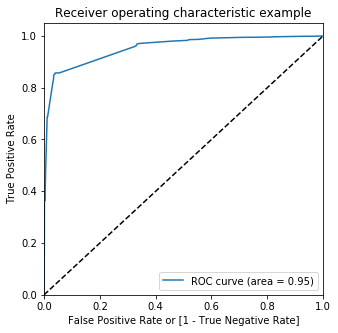

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Here, ROC curve area is high. So, we can definitly proceed with this prediction.

### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.223991,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.067739,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000904,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.789428,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.979926,7987,1,1,1,1,1,1,1,1,1,1,1


In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.764919  0.973017  0.634571
0.2   0.2  0.782711  0.960752  0.671191
0.3   0.3  0.919383  0.856909  0.958515
0.4   0.4  0.920170  0.856092  0.960307
0.5   0.5  0.920013  0.851594  0.962868
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.915131  0.834015  0.965941
0.8   0.8  0.872776  0.690515  0.986940
0.9   0.9  0.790427  0.464023  0.994878


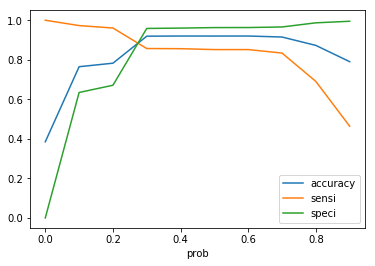

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Here, the optimum point is nearer to 0.3. So, i will consider the cutoff is 0.3.  

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.223991,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.067739,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000904,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.789428,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.979926,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9193827743662415

- confusion matrix after final prediction

In [149]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3743,  162],
       [ 350, 2096]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.856909239574816

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.9585147247119078

In [153]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04148527528809219


In [154]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9282550930026572


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9144881505008551


### Precision and Recall

- Looking at the confusion matrix again

In [156]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3760,  145],
       [ 363, 2083]], dtype=int64)

#### Precision
TP / TP + FP

In [157]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9349192100538599

#### Recall
TP / TP + FN

In [158]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

##### By using scikit learn

In [159]:
from sklearn.metrics import precision_score, recall_score

In [160]:
print("The precision Score: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

The precision Score:  0.9349192100538599


In [161]:
print("The recall Score: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

The recall Score:  0.8515944399018807


### Precision and recall tradeoff

In [162]:
from sklearn.metrics import precision_recall_curve

In [163]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [164]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


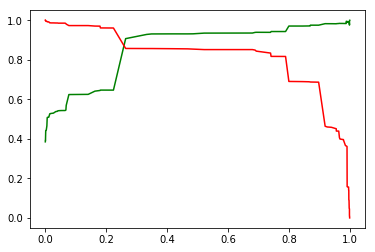

In [165]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [166]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])



C:\Users\611806022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\611806022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [167]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [168]:
X_test_sm = sm.add_constant(X_test)

- Making predictions on the test set

In [169]:
y_test_pred = res.predict(X_test_sm)

In [170]:
y_test_pred[:10]

3271    0.223991
1490    0.898081
7936    0.223991
4216    0.999312
3830    0.223991
1800    0.898081
6507    0.011619
4821    0.000492
4223    0.997139
4714    0.223991
dtype: float64

In [171]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [172]:
# Let's see the head
y_pred_1.head()

,0
3271,0.223991
1490,0.898081
7936,0.223991
4216,0.999312
3830,0.223991


In [173]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [174]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [175]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [176]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [177]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.223991
1,1,1490,0.898081
2,0,7936,0.223991
3,1,4216,0.999312
4,0,3830,0.223991


In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [179]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [180]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.223991
1,1490,1,0.898081
2,7936,0,0.223991
3,4216,1,0.999312
4,3830,0,0.223991


##### From Precision and recall tradeoff threshold, we can see the cutoff is 0.28

In [181]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [182]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.223991,0
1,1490,1,0.898081,1
2,7936,0,0.223991,0
3,4216,1,0.999312,1
4,3830,0,0.223991,0


####  Let's check the overall accuracy.

In [183]:

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9144326110907087

In [184]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1661,   73],
       [ 160,  829]], dtype=int64)

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8382204246713852

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.9579008073817762

- Creating new feild "Lead Score" for test data, which is between 0 to 100. 

In [188]:
X_test['Lead Score']=y_pred_final.Converted_Prob.values

In [189]:
X_test['Lead Score']=round((X_test['Lead Score']*100),2)

In [190]:
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent,Lead Score
3271,0,0,0,0,0,0,0,0,1,0,1,0,0,22.40
1490,0,0,0,0,0,0,0,0,1,0,0,0,0,89.81
7936,0,0,0,0,0,0,0,0,1,0,1,0,0,22.40
4216,0,1,0,0,0,1,0,0,0,0,0,0,0,99.93
3830,0,0,0,0,0,0,0,0,1,0,1,0,0,22.40


#### We can see that the ovarall accuracy score is 91%, which is very good score for the model. So, we will go ahaed and again see the important features, on which, the organisation can focus more.

In [191]:
for i in range(0,(len(Lead_Data_Final2.columns)-1)):
    print(Lead_Data_Final2.columns[i])

Prospect ID
Lead Origin
Lead Source
Do Not Email
Do Not Call
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Last Activity
Specialization
What is your current occupation
Tags
Lead Quality
City


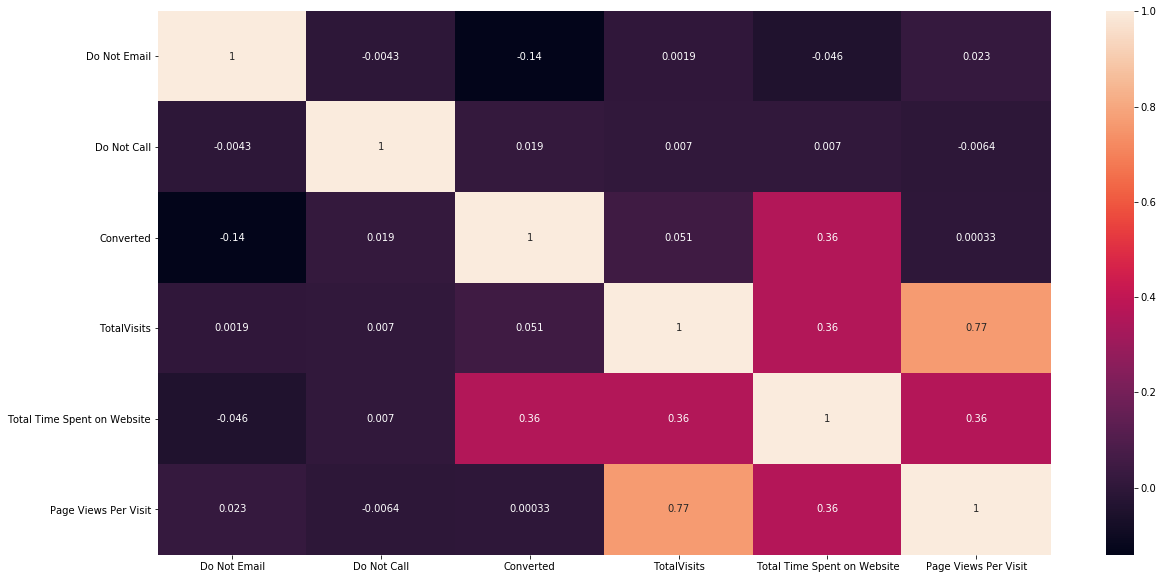

In [192]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(Lead_Data_Final2.corr(),annot = True)
plt.show()

- From above correlation matrix, we can see Total time spent on website and Converted are highly co-related. 

##### Splitting the filtered data into train and test to assign the lead score (considering logistic probability value) to each leads.

In [193]:
lead_Data_Train, lead_Data_Test = train_test_split(Lead_Data_Final2, train_size=0.7, test_size=0.3, random_state=100)

- Creating a new variable "Converted_Score" to store lead scores for test data set with original required variables.


In [194]:
lead_Data_Test['Lead score']=y_pred_final.Converted_Prob.values

In [195]:

lead_Data_Test['Lead score']=round((lead_Data_Test['Lead score']*100),2)

- Let's see th ehead of the test dataset with lead scores.

In [196]:
lead_Data_Test.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead score
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,API,Google,0,0,0,4.0,157,4.0,Email Opened,Others,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Email Opened,22.40
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,Landing Page Submission,Direct Traffic,0,0,1,5.0,1513,5.0,Email Opened,Media and Advertising,Working Professional,Will revert after reading the email,Low in Relevance,Mumbai,Email Opened,89.81
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,API,Google,0,0,0,2.0,74,2.0,Email Opened,Others,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Email Opened,22.40
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,Lead Add Form,Reference,0,0,1,0.0,0,0.0,Email Opened,E-COMMERCE,Student,Closed by Horizzon,Low in Relevance,Mumbai,Modified,99.93
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,Landing Page Submission,Organic Search,0,0,0,8.0,164,6.0,Email Opened,Retail Management,Unemployed,Will revert after reading the email,Not Sure,Other Cities,Email Opened,22.40


#### Plotting graphs between all the variables and Lead Scores

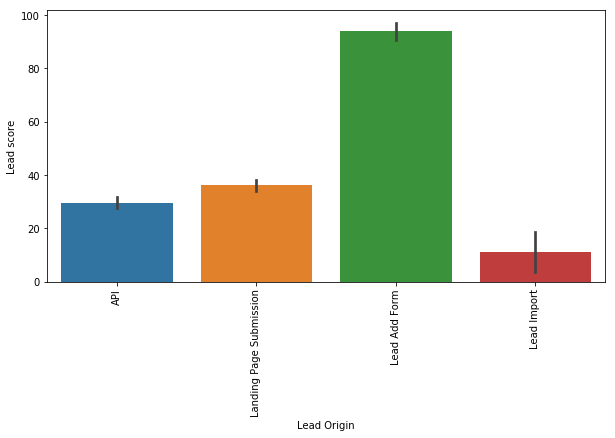

In [197]:
plt.figure(figsize = (10,5))
s=sns.barplot(x="Lead Origin", y="Lead score", data=lead_Data_Test)

s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- After calculating Lead score, we can see leads, who are added by lead add form. 


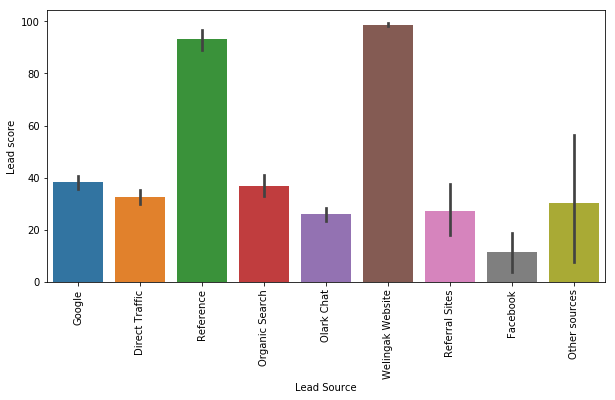

In [198]:
plt.figure(figsize = (10,5))
s=sns.barplot(x="Lead Source", y="Lead score", data=lead_Data_Test)

s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Welingak and reference are the main source for leads.


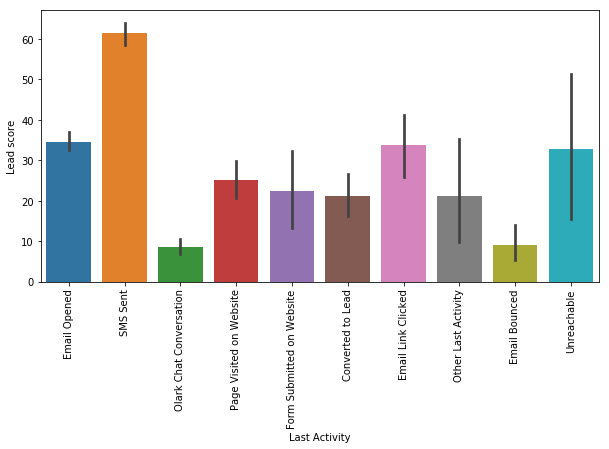

In [199]:
plt.figure(figsize = (10,5))
s=sns.barplot(x="Last Activity", y="Lead score", data=lead_Data_Test)

s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- As per lead score, the last activity is done by leads are sending SMS, Email. So, These would be the notable way to communicate the leads.


#### Here, we can see the lead scores for each lead, which is in between 0 to 100.

- I am just curious to see the result in the csv file. So, Exporting the final data set to csv file

In [200]:
lead_Data_Test.to_csv('Final Lead Data with Score.csv')

## Conclusion and Recomendation

- The lead scores are assigned to each lead and it will help X Education to identify the potential leads, called as 'Hot    leads'. So that, the company can successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
- The potential leads can be decided on the basis of lead scores now. 
- If the lead score is higher i.e. greater than 80, then the lead is hot and is most likely to convert. 
- If the lead score is low i.e. let's say less than 50, then lead is low and will mostly not get converted.

##### X Education can focus on below criterias of the leads to identify the more potential leads.

- Lead Origin : API, Landing Page Submission and Lead Add 
- Lead Source : Direct Traffic, Google, reference and welingak website
- Do Not Email
- Do Not Call
- TotalVisits  
- Total Time Spent on Website 
- Page Views Per Visit
- Last Activity : Email and SMS
- Specialization 
- What is your current occupation : Unemployed & Working Professional
- Tags 
- Lead Quality
- City : Mumbai
